<a href="https://colab.research.google.com/github/KPsimo/Kidus_Football_Games/blob/main/DSRP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings #Just imported everything from Linear regression, KNN, matplotlib, and evaluation metrics
warnings.filterwarnings('ignore')

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets, model_selection, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

In [3]:
from google.colab import drive

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/GAMES . CSV/games.csv')

In [4]:
df.columns = df.columns.str.title() #Makes first letter uppercase
df.columns = df.columns.str.replace('_', ' ') #Replaces underscore(_) with space( )
df['Surface'] = df['Surface'].str.strip() #Removes any extra characters such as spaces, used this for grass.

In [5]:
df['Temp'].median()

59.0

In [6]:
df[df['Wind']>55]
df = df.drop(index =[2396]) # Outlier wind speed (71 mph)
df= df.drop(index =[4703])# Outlier wind speed (70 mph)

In [7]:
df[df['Result']<-20]
df.columns

Index(['Game Id', 'Season', 'Game Type', 'Week', 'Gameday', 'Weekday',
       'Gametime', 'Away Team', 'Away Score', 'Home Team', 'Home Score',
       'Location', 'Result', 'Total', 'Overtime', 'Old Game Id', 'Gsis',
       'Nfl Detail Id', 'Pfr', 'Pff', 'Espn', 'Ftn', 'Away Rest', 'Home Rest',
       'Away Moneyline', 'Home Moneyline', 'Spread Line', 'Away Spread Odds',
       'Home Spread Odds', 'Total Line', 'Under Odds', 'Over Odds', 'Div Game',
       'Roof', 'Surface', 'Temp', 'Wind', 'Away Qb Id', 'Home Qb Id',
       'Away Qb Name', 'Home Qb Name', 'Away Coach', 'Home Coach', 'Referee',
       'Stadium Id', 'Stadium'],
      dtype='object')

Removing unnessecary columns

In [8]:
cols_to_drop = ['Away Qb Name', 'Home Qb Name', 'Away Qb Id', 'Home Qb Id', 'Away Coach',
               'Home Coach', 'Pff', 'Ftn', 'Away Rest', 'Home Rest', 'Pff', 'Ftn', 'Nfl Detail Id',
               'Pfr', 'Espn', 'Away Rest', 'Home Rest', 'Old Game Id', 'Gsis', 'Stadium Id', 'Stadium',
               'Under Odds', 'Over Odds', 'Div Game', 'Game Id']
fixed_df = df.drop(columns=cols_to_drop)
fixed_df.columns

fixed_df['Temp'].median()

(fixed_df['Roof'] == 'dome').sum()

np.int64(1194)

In [9]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Temp'].fillna(fixed_df['Temp'].median())
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Temp'].fillna(fixed_df['Temp'].median()) #Regulated temp so I took the median to balalnce

In [10]:
fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'closed', 'Wind'].fillna(0)
fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'] = fixed_df.loc[fixed_df['Roof'] == 'dome', 'Wind'].fillna(0) #Indoors has no wind
pd.set_option('display.max_columns', None)  # Shows all the columns

New Column for Wins

In [11]:
fixed_df['Result']

,Result
0,-3.0
1,3.0
2,-43.0
3,4.0
4,17.0
...,...
7258,NaN
7259,NaN
7260,NaN
7261,NaN


In [12]:
fixed_df['Home Result'] = ''

fixed_df.loc[fixed_df['Result'] > 0, 'Home Result'] = "Win"
fixed_df.loc[fixed_df['Result'] < 0, 'Home Result'] = "Lose"
fixed_df.loc[fixed_df['Result'] == 0, 'Home Result'] = "Draw"

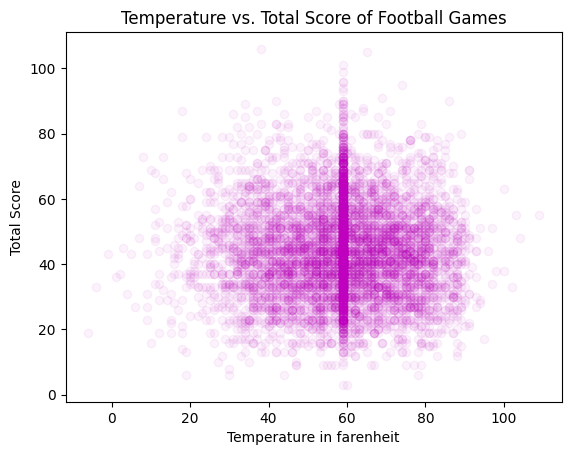

In [13]:
categories = fixed_df['Temp']
bars = fixed_df['Total']

plt.scatter(categories, bars, alpha = 0.05, c= 'm')
plt.title("Temperature vs. Total Score of Football Games")
plt.ylabel("Total Score")
plt.xlabel("Temperature in farenheit")
plt.show()


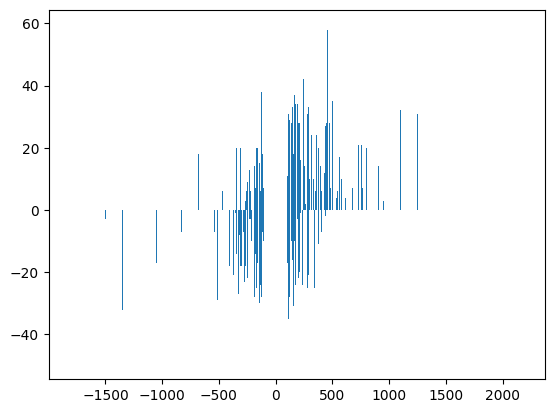

In [14]:
plot_df = fixed_df[['Away Moneyline', 'Result']].dropna()
plot_df.isnull().value_counts()
plot_df

plt.bar(plot_df['Away Moneyline'], plot_df['Result'])
plt.show()

In [15]:
df['Stadium'].unique()

array(['Georgia Dome', 'Soldier Field', 'Cleveland Browns Stadium',
       'Lambeau Field', 'RCA Dome', 'Alltel Stadium',
       'Louisiana Superdome', 'Giants Stadium', 'Veterans Stadium',
       'Seattle Kingdome', 'TWA Dome', 'Raymond James Stadium',
       'Adelphia Coliseum', 'Jack Kent Cooke Stadium',
       'Mile High Stadium', 'PSINet Stadium', 'Ralph Wilson Stadium',
       'Ericsson Stadium', 'Cinergy Field', 'Pontiac Silverdome',
       'Arrowhead Stadium', 'Pro Player Stadium',
       'Hubert H. Humphrey Metrodome', 'Foxboro Stadium', '3Com Park',
       'Texas Stadium', 'Network Associates Coliseum',
       'Three Rivers Stadium', 'Qualcomm Stadium', 'Sun Devil Stadium',
       'FedExField', 'Paul Brown Stadium', 'Husky Stadium',
       'Invesco Field at Mile High', "Dome at America's Center",
       'Heinz Field', 'Memorial Stadium (Champaign)', 'The Coliseum',
       'Reliant Stadium', 'Gillette Stadium', 'Ravens Stadium',
       'Seahawks Stadium', 'Edward Jones Dome', 

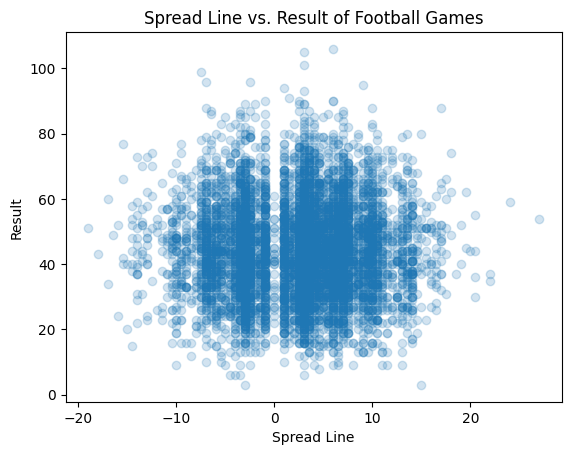

In [23]:
categories = fixed_df['Spread Line']
bars = fixed_df['Total']

plt.scatter(categories, bars, alpha = 0.2)
plt.title("Spread Line vs. Result of Football Games")
plt.ylabel("Result")
plt.xlabel("Spread Line")
plt.show()